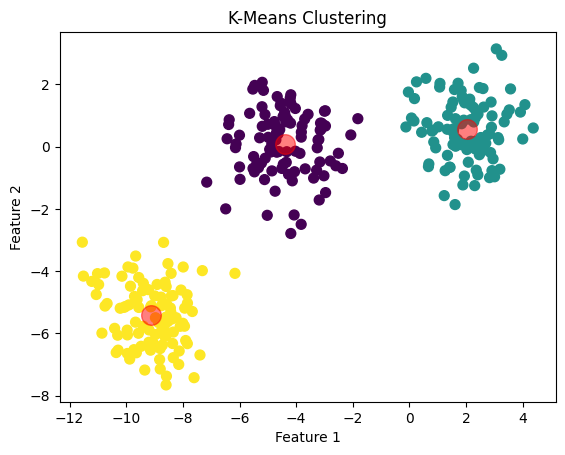

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

kmeans = KMeans(n_clusters=3, random_state=random_state)

kmeans.fit(X)

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

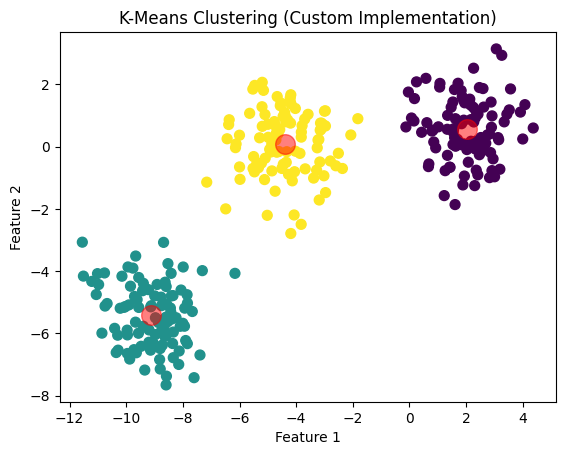

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100):

  n_samples = X.shape[0]
  n_features = X.shape[1]

  cluster_centers = X[np.random.choice(n_samples, k, replace=False)]

  for _ in range(max_iters):
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - cluster_centers[np.newaxis, :, :]) ** 2, axis=2))
    cluster_assignments = np.argmin(distances, axis=1)

    new_cluster_centers = np.array([X[cluster_assignments == i].mean(axis=0) for i in range(k)])

    if np.allclose(cluster_centers, new_cluster_centers):
      break

    cluster_centers = new_cluster_centers

  return cluster_assignments, cluster_centers


n_samples = 300
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

k = 3
labels, cluster_centers = kmeans(X, k)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (Custom Implementation)')
plt.show()